In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
data = pd.read_csv("titanic.csv")
df = pd.DataFrame(data)

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
selected_columns = ['Sex', 'Survived']
new_df = df[selected_columns]
new_df.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [70]:
print(new_df.isnull().sum())

Sex         0
Survived    0
dtype: int64


In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Survived  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [72]:
new_df.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [73]:
sex_mapping = {'female' : 0, 'male' : 1}
new_df['Sex'] = new_df['Sex'].map(sex_mapping)
new_df.head()

/tmp/ipykernel_16985/3208305443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sex'] = new_df['Sex'].map(sex_mapping)


,Sex,Survived
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [74]:
new_df.describe()

,Sex,Survived
count,891.000000,891.000000
mean,0.647587,0.383838
std,0.477990,0.486592
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


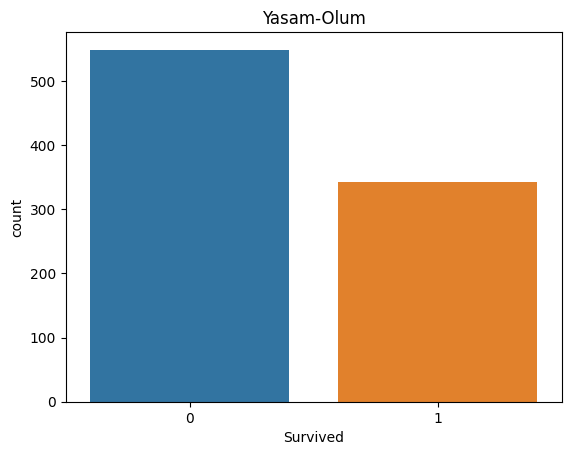

In [75]:
sns.countplot(x = 'Survived', data = new_df)
plt.title("Yasam-Olum")
plt.show()

In [76]:
women = new_df[new_df['Sex'] == 0].copy()
women.head()

,Sex,Survived
1,0,1
2,0,1
3,0,1
8,0,1
9,0,1


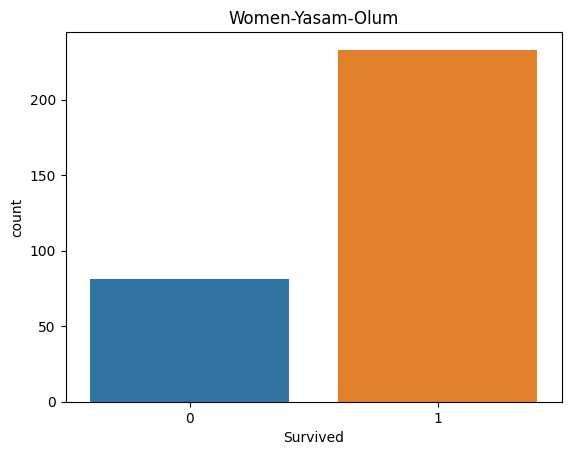

In [77]:
sns.countplot(x = 'Survived', data = women)
plt.title("Women-Yasam-Olum")
plt.show()

In [78]:
men = new_df[new_df['Sex'] == 1].copy()
men.head()

,Sex,Survived
0,1,0
4,1,0
5,1,0
6,1,0
7,1,0


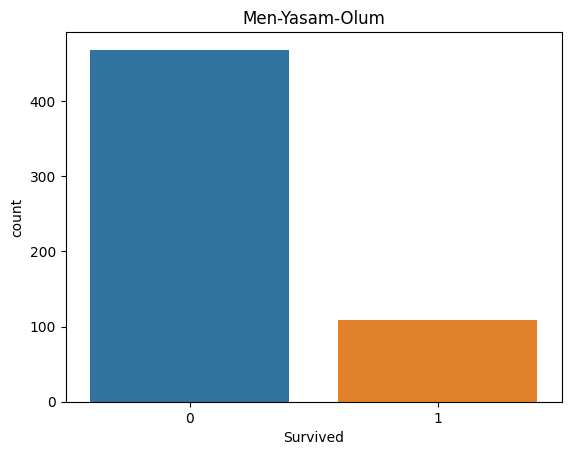

In [79]:
sns.countplot(x = 'Survived', data = men)
plt.title("Men-Yasam-Olum")
plt.show()

In [80]:
X_women = women.drop('Survived',axis = 1)
Y_women = women['Survived']

In [81]:
X_men = men.drop('Survived',axis = 1)
Y_men = men['Survived']

In [82]:
X_women_train, X_women_test, Y_women_train, Y_women_test = train_test_split(X_women, Y_women, test_size = 0.2, random_state = 42)
X_men_train, X_men_test, Y_men_train, Y_men_test = train_test_split(X_men, Y_men, test_size = 0.2, random_state = 42)

In [83]:
women_model = LogisticRegression()
men_model = LogisticRegression()


In [84]:
women_model.fit(X_women_train, Y_women_train)
women_pred = women_model.predict(X_women_test)

men_model.fit(X_men_train, Y_men_train)
men_pred = men_model.predict(X_men_test)

In [85]:
women_accaurary = accuracy_score(Y_women_test, women_pred)
men_accaurary = accuracy_score(Y_men_test, men_pred)

print("Kadin orani:", women_accaurary)
print("Erkek orani:", men_accaurary)

Kadin orani: 0.7142857142857143
Erkek orani: 0.8275862068965517
